<a href="https://colab.research.google.com/github/RMadhuni/Big-data-analytics/blob/main/BDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import DataConversionWarning
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
# Import plot_confusion_matrix from the correct module
from sklearn.metrics import ConfusionMatrixDisplay # This line has been changed

In [ ]:
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [ ]:
# Drop ID column if it exists
train.drop(columns=['id'], errors='ignore', inplace=True)
test.drop(columns=['id'], errors='ignore', inplace=True)


In [ ]:
# Define Features and Target
features = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
            'Flight Distance', 'Inflight wifi service',
            'Departure/Arrival time convenient', 'Ease of Online booking',
            'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
            'Inflight entertainment', 'On-board service', 'Leg room service',
            'Baggage handling', 'Checkin service', 'Inflight service',
            'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

target = ['satisfaction']

In [ ]:
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]


In [ ]:
# Encode target labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

In [ ]:
# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)


In [ ]:
# Define training pipeline
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        max_depth=25,
        min_samples_leaf=1,
        min_samples_split=2,
        n_estimators=1200,
        random_state=42
    ))
])


In [ ]:

# Model runner function
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC_AUC = {}".format(roc_auc))
    print(classification_report(y_test, y_pred, digits=5))
    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize='all')
    plt.show()
    return model, roc_auc


✅ Model Evaluation Results
ROC_AUC Score: 0.9610875568559365

Classification Report:
               precision    recall  f1-score   support

           0    0.95655   0.97900   0.96765     14573
           1    0.97234   0.94317   0.95753     11403

    accuracy                        0.96327     25976
   macro avg    0.96444   0.96109   0.96259     25976
weighted avg    0.96348   0.96327   0.96321     25976



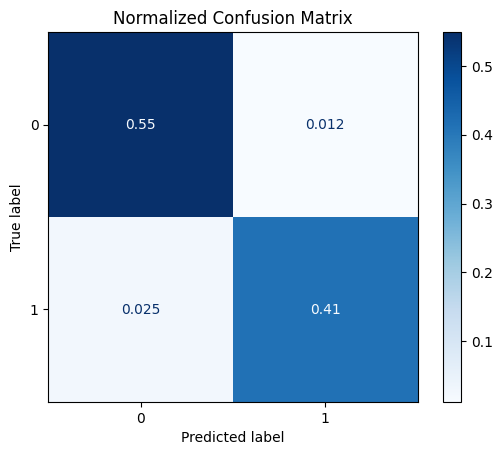

In [ ]:
# Function to train and evaluate model
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)

    print("\n✅ Model Evaluation Results")
    print("ROC_AUC Score:", roc_auc)
    print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=5))

    # Use ConfusionMatrixDisplay instead of plot_confusion_matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues, normalize='all')
    # or ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues, normalize='all')

    plt.title("Normalized Confusion Matrix")
    plt.show()

    return model, roc_auc

# Run the model and print output
model_rf, roc_auc_rf = run_model(model_rf, X_train, y_train, X_test, y_test)